In [3]:
import matplotlib.pyplot as plt
import pickle

In [4]:
with open("sp12.pickle", "rb") as f: 
    cost_data, circs = pickle.load(f)

Text(0.5, 1.0, '$n=12$, $\\theta=0.35\\pi$')

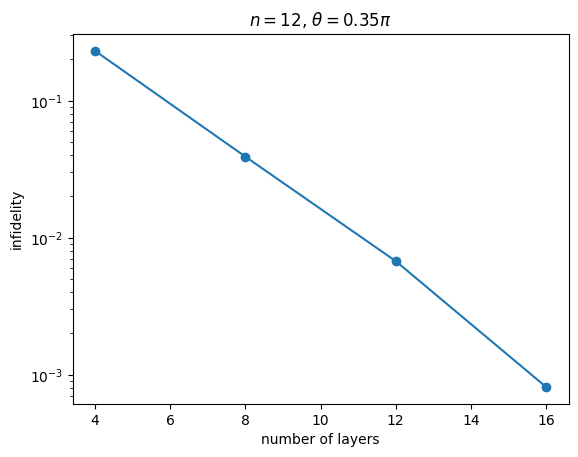

In [13]:
plt.plot([4,8,12,16], [c[-1] for c in cost_data], '-o')
plt.xlabel("number of layers")
plt.ylabel("infidelity")
plt.yscale('log')
plt.title(r'$n=12$, $\theta=0.35\pi$')